In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [49]:
# Load data
df = pd.read_csv('diabetes.csv', sep=';')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Dari dataset tersebut terdapat beberapa fitur sebagai berikut:

-   **Pregnancies**: Jumlah kehamilan yang dialami oleh individu. Ini adalah faktor yang dapat memengaruhi risiko diabetes.

-   **Glucose**: Level glukosa darah (kadar gula darah) dalam tes darah. Glukosa yang tinggi bisa menjadi indikator diabetes.

-   **BloodPressure**: Tekanan darah diukur dalam milimeter merkuri (mmHg). Tekanan darah tinggi bisa terkait dengan risiko diabetes.

-   **SkinThickness**: Ketebalan lipatan kulit (biasanya di area triceps) yang diukur dengan kaliper. Ini bisa digunakan untuk menilai resistensi insulin.

-   **Insulin**: Kadar insulin dalam darah. Insulin berfungsi untuk mengontrol kadar gula dalam darah, dan ketidakseimbangan dapat mengindikasikan masalah dengan metabolisme glukosa.

-   **BMI**: Body Mass Index (Indeks Massa Tubuh), yang mengukur rasio antara berat badan dan tinggi badan. BMI tinggi sering dikaitkan dengan risiko diabetes tipe 2.

-   **DiabetesPedigreeFunction**: Sebuah skor yang menunjukkan riwayat keluarga individu terkait dengan diabetes. Ini membantu menentukan apakah ada kecenderungan genetik terhadap penyakit tersebut.

-   **Age**: Usia individu dalam tahun. Usia yang lebih tua sering dikaitkan dengan peningkatan risiko diabetes.

-   **Outcome**: Hasil apakah individu tersebut memiliki diabetes atau tidak (0 = Tidak, 1 = Ya).


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Pada beberapa fitur yang tidak mungkin memiliki nilai 0 secara alami, nilai 0 kemungkinan besar adalah data yang hilang (missing values) atau error dalam pencatatan.

Dari data tersebut, fitur yang seharusnya tidak boleh 0 adalah:

-   **Glucose (Kadar Gula Darah)** → Seharusnya tidak mungkin 0 karena manusia selalu memiliki kadar gula darah.

-   **BloodPressure (Tekanan Darah)** → Tekanan darah 0 artinya seseorang tidak hidup. Jadi, ini kemungkinan besar adalah data hilang.

-   **SkinThickness (Ketebalan Kulit di Lengan, mm)** → Tidak mungkin 0 karena semua orang memiliki kulit.

-   **Insulin (Kadar Insulin dalam Darah)** → Jika 0, bisa jadi data hilang karena tubuh manusia biasanya menghasilkan insulin, kecuali pada kasus diabetes tipe 1 yang parah.

-   **BMI (Body Mass Index)** → Nilai 0 sangat tidak mungkin karena setiap orang memiliki berat dan tinggi badan.

Sementara itu, fitur seperti DiabetesPedigreeFunction, dan Outcome masih masuk akal jika ada nilai 0, karena:
-   **Pregnancies**, jika nilai 0 bisa jadi memang seorang wanita yang belum pernah hamil atau laki-laki
-   **DiabetesPedigreeFunction** (riwayat keluarga dengan diabetes) bisa saja 0 jika tidak ada riwayat diabetes dalam keluarga.
-   **Outcome** adalah label (0 = tidak diabetes, 1 = diabetes), jadi nilai 0 memang valid.

In [52]:
df.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

# **Visualisasi**

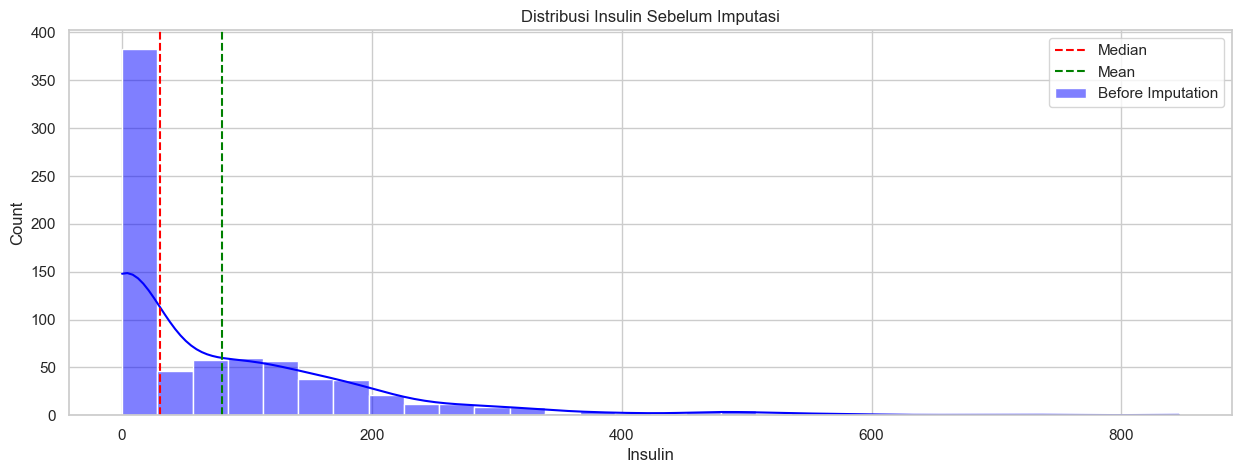

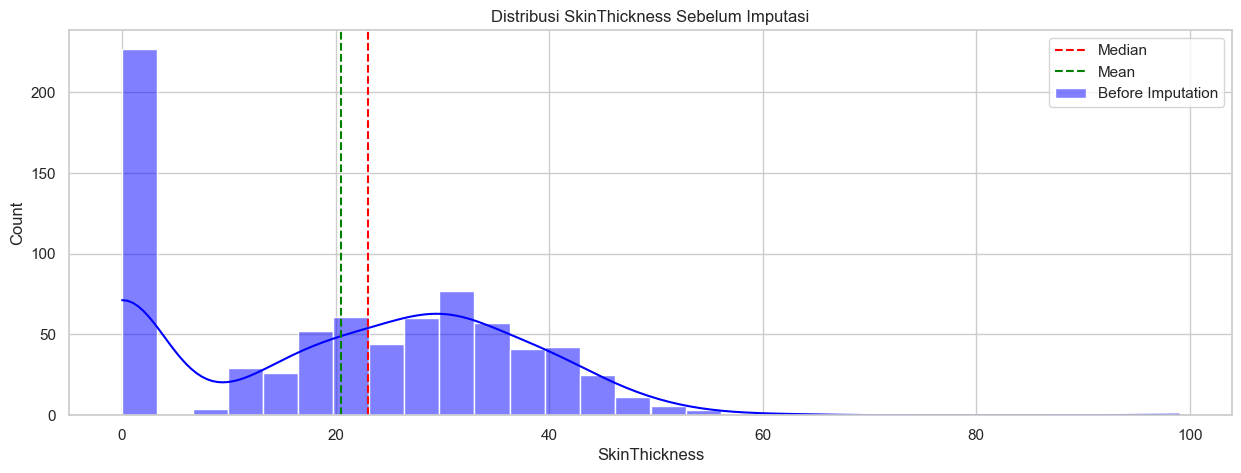

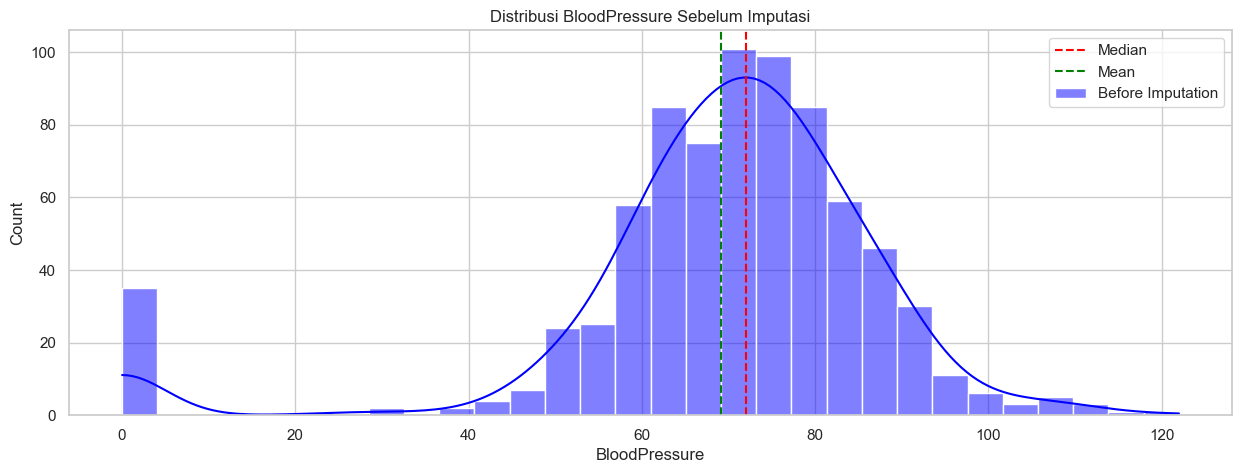

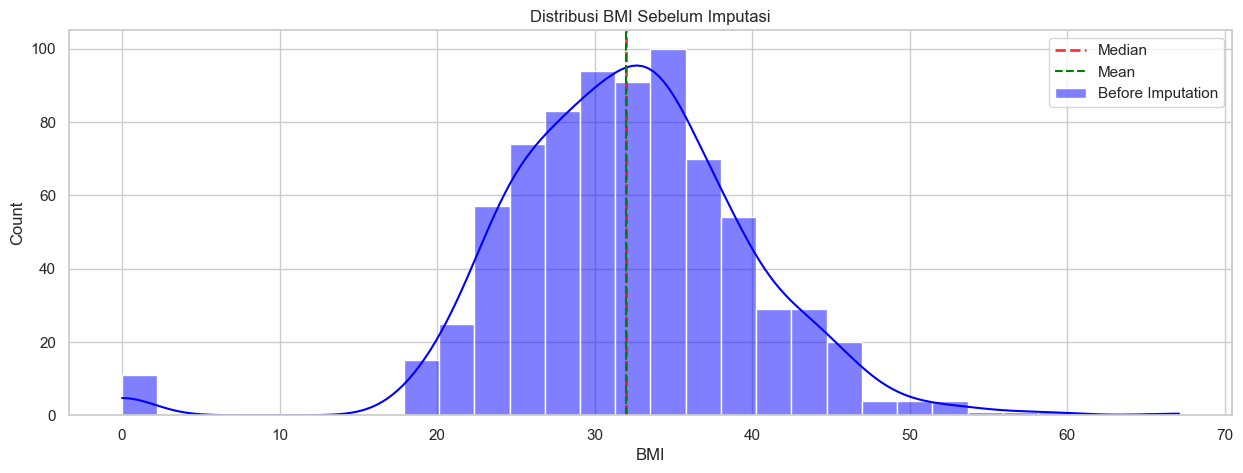

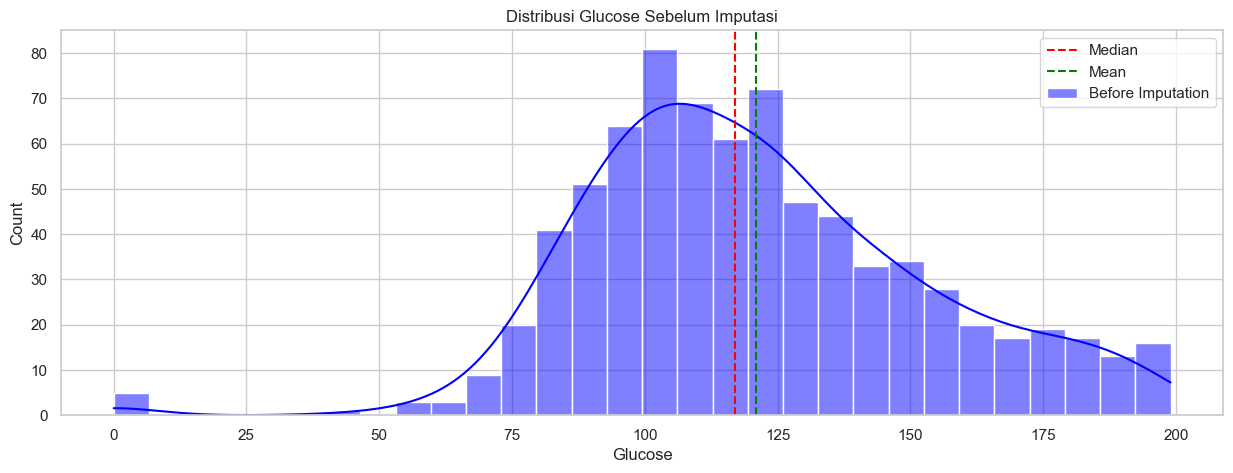

In [53]:
# Visualisasi Distribusi pada Kolom Glucose, BloodPressure, SkinThickness, Insulin, BMI
# Plot distribusi Insulin sebelum imputasi
plt.figure(figsize=(15,5))

sns.histplot(df['Insulin'], bins=30, kde=True, color='blue', label='Before Imputation')
plt.axvline(df['Insulin'].median(), color='red', linestyle='dashed', label='Median')
plt.axvline(df['Insulin'].mean(), color='green', linestyle='dashed', label='Mean')

plt.title("Distribusi Insulin Sebelum Imputasi")
plt.legend()
plt.show()


# Plot distribusi SkinThickness sebelum imputasi
plt.figure(figsize=(15,5))

sns.histplot(df['SkinThickness'], bins=30, kde=True, color='blue', label='Before Imputation')
plt.axvline(df['SkinThickness'].median(), color='red', linestyle='dashed', label='Median')
plt.axvline(df['SkinThickness'].mean(), color='green', linestyle='dashed', label='Mean')

plt.title("Distribusi SkinThickness Sebelum Imputasi")
plt.legend()
plt.show()


# Plot distribusi BloodPressure sebelum imputasi
plt.figure(figsize=(15,5))

sns.histplot(df['BloodPressure'], bins=30, kde=True, color='blue', label='Before Imputation')
plt.axvline(df['BloodPressure'].median(), color='red', linestyle='dashed', label='Median')
plt.axvline(df['BloodPressure'].mean(), color='green', linestyle='dashed', label='Mean')

plt.title("Distribusi BloodPressure Sebelum Imputasi")
plt.legend()
plt.show()

# Plot distribusi BMI sebelum imputasi
plt.figure(figsize=(15,5))

sns.histplot(df['BMI'], bins=30, kde=True, color='blue', label='Before Imputation')
plt.axvline(df['BMI'].median(),linewidth=2, alpha=0.8, color='red', linestyle='dashed', label='Median')
plt.axvline(df['BMI'].mean(), color='green', linestyle='dashed', label='Mean')

plt.title("Distribusi BMI Sebelum Imputasi")
plt.legend()
plt.show()


# Plot distribusi Glucose sebelum imputasi
plt.figure(figsize=(15,5))

sns.histplot(df['Glucose'], bins=30, kde=True, color='blue', label='Before Imputation')
plt.axvline(df['Glucose'].median(), color='red', linestyle='dashed', label='Median')
plt.axvline(df['Glucose'].mean(), color='green', linestyle='dashed', label='Mean')

plt.title("Distribusi Glucose Sebelum Imputasi")
plt.legend()
plt.show()


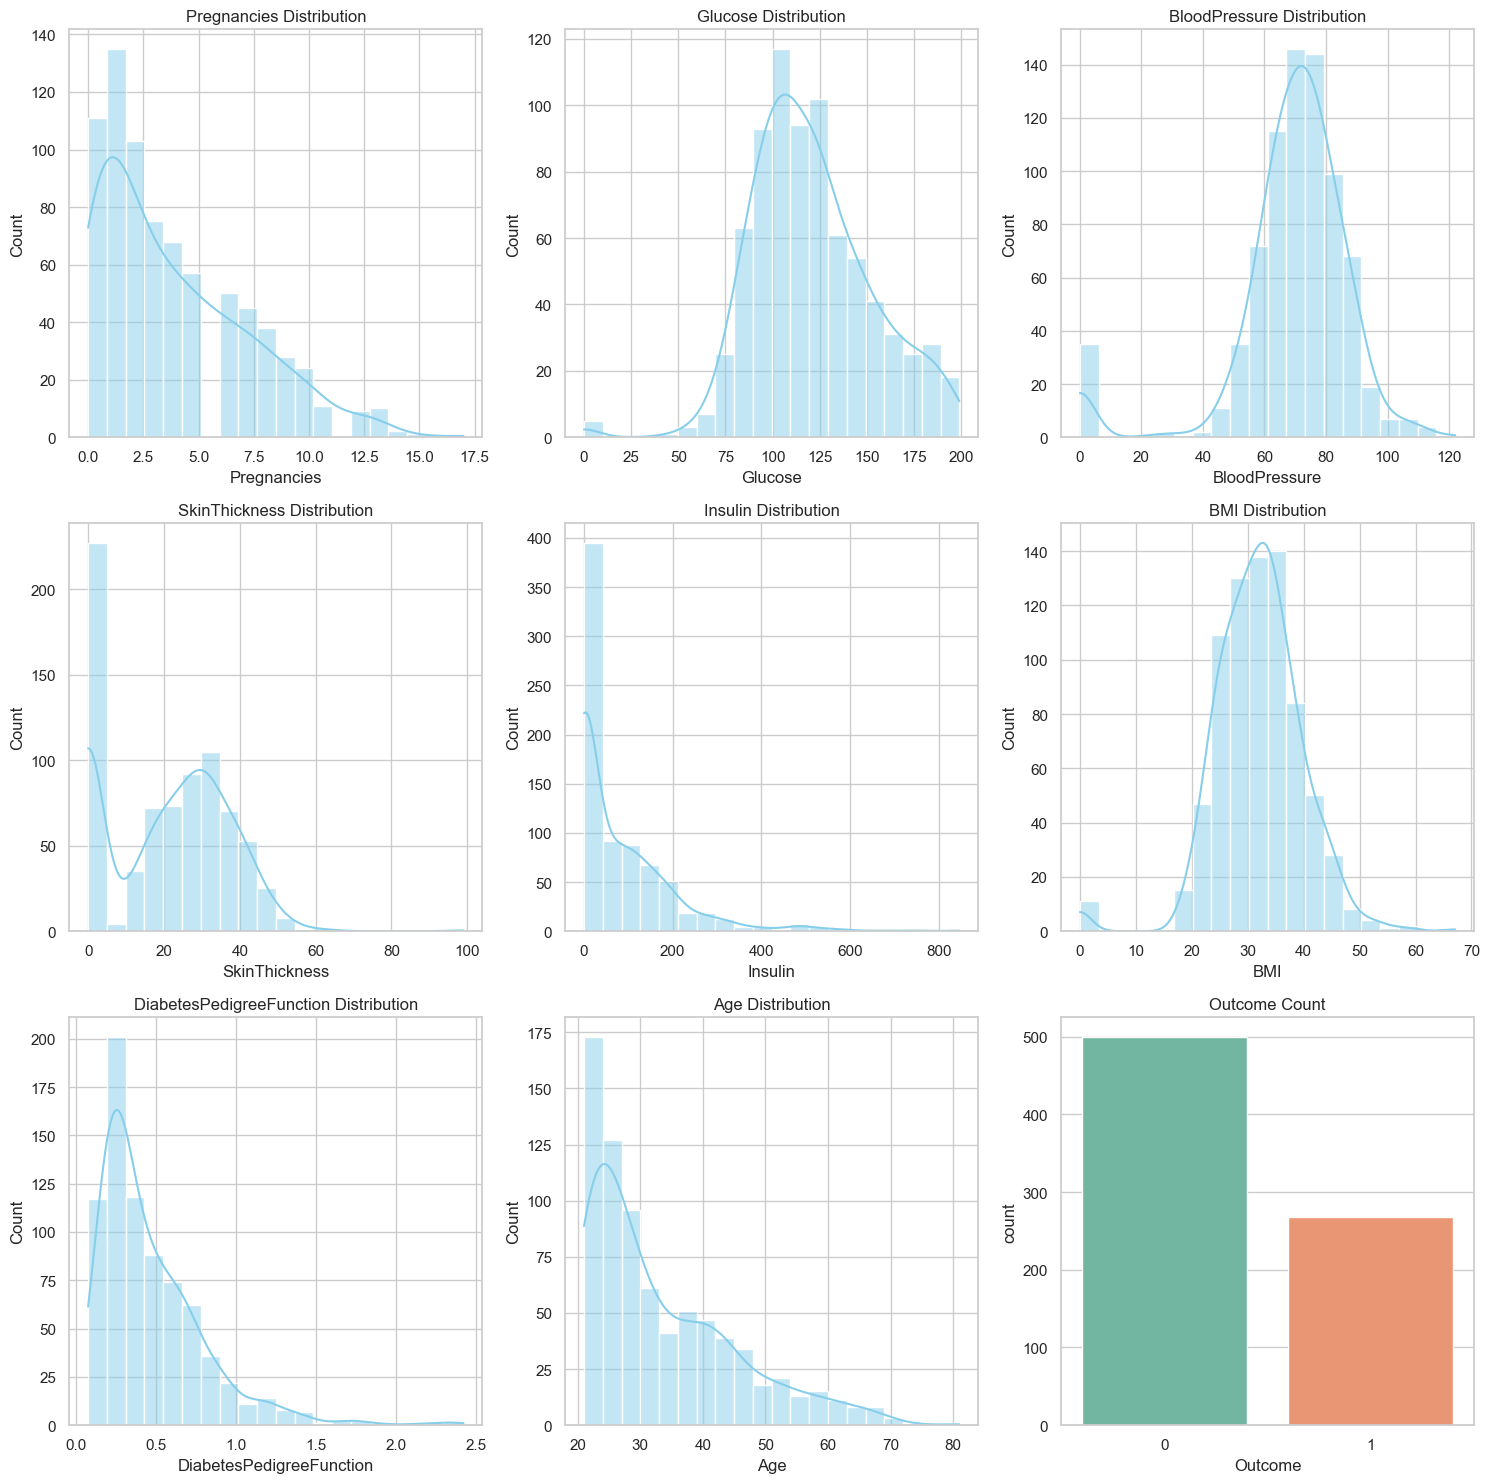

In [54]:
# Visualisasi Data sebelum Imputasienyiapkan plot
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Menyusun fitur dan jenis visualisasi
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
plot_types = ['hist', 'hist', 'hist', 'hist', 'hist', 'hist', 'hist', 'hist', 'countplot']

# Membuat plot untuk setiap fitur
for i, feature in enumerate(features):
    ax = axes[i//3, i%3]  # Menentukan posisi plot
    if plot_types[i] == 'hist':
        sns.histplot(df[feature], kde=True, ax=ax, color='skyblue', bins=20)
        ax.set_title(f'{feature} Distribution')
    elif plot_types[i] == 'countplot':
        sns.countplot(x=df[feature], ax=ax, palette='Set2')
        ax.set_title(f'{feature} Count')

plt.tight_layout()
plt.show()

# **Data Cleansing**

In [55]:
# cek duplicate rows
df.duplicated().sum()

np.int64(0)

## Handle *Missing Value*

In [56]:
# cek missing values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [57]:
# cek null values
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [58]:
# Cek distribusi nilai 0 pada kolom
columns_to_check = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']
print(f"Distribusi nilai 0:")
print("=" * 30)
for col in columns_to_check:
    print(f"{col}: {df[col].value_counts().get(0, 0)}")

Distribusi nilai 0:
Pregnancies: 111
Glucose: 5
BloodPressure: 35
SkinThickness: 227
Insulin: 374
BMI: 11
DiabetesPedigreeFunction: 0
Age: 0
Outcome: 500


In [59]:
# Presentase nilai 0 pada tiap fitur
target_columns = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Ganti 0 dengan NaN agar dapat diimputasi
df[target_columns] = df[target_columns].replace(0, np.nan)

# Mengecek presentase missing value pada tiap kolom
missing_percent = df.replace(0, None).isnull().sum() / len(df) * 100
print("Presentase nilai 0")
print("="*40)
print(missing_percent)


Presentase nilai 0
Pregnancies                 14.453125
Glucose                      0.651042
BloodPressure                4.557292
SkinThickness               29.557292
Insulin                     48.697917
BMI                          1.432292
DiabetesPedigreeFunction     0.000000
Age                          0.000000
Outcome                     65.104167
dtype: float64


In [60]:
# Analisis Statistik Sebelum dan Sesudah Mengganti Nilai 0 dengan NaN
cols_medis = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# 2. Deskripsi Statistik Mentah (Masih mengandung nilai 0)
print("--- Statistik Mentah (Termasuk Nilai 0) ---")
print(df[cols_medis].describe())

# 3. Mengubah nilai 0 menjadi NaN (Not a Number)
# Agar fungsi statistik seperti mean dan median tidak menghitung angka 0 tersebut
df_temp = df.copy()
df_temp[cols_medis] = df_temp[cols_medis].replace(0, np.nan)

# 4. Deskripsi Statistik Valid (Data Medis yang Sebenarnya)
print("\n--- Statistik Valid (Setelah 0 diubah ke NaN) ---")
stats_valid = df_temp[cols_medis].describe()
print(stats_valid)

# 5. Melihat Median secara spesifik
# Median seringkali lebih stabil daripada Mean untuk data medis yang memiliki outlier
print("\n--- Median Data Valid ---")
print(df_temp[cols_medis].median())

--- Statistik Mentah (Termasuk Nilai 0) ---
          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  763.000000     733.000000     541.000000  394.000000  757.000000
mean   121.686763      72.405184      29.153420  155.548223   32.457464
std     30.535641      12.382158      10.476982  118.775855    6.924988
min     44.000000      24.000000       7.000000   14.000000   18.200000
25%     99.000000      64.000000      22.000000   76.250000   27.500000
50%    117.000000      72.000000      29.000000  125.000000   32.300000
75%    141.000000      80.000000      36.000000  190.000000   36.600000
max    199.000000     122.000000      99.000000  846.000000   67.100000

--- Statistik Valid (Setelah 0 diubah ke NaN) ---
          Glucose  BloodPressure  SkinThickness     Insulin         BMI
count  763.000000     733.000000     541.000000  394.000000  757.000000
mean   121.686763      72.405184      29.153420  155.548223   32.457464
std     30.535641      12.382158      10.

In [61]:
from sklearn.impute import SimpleImputer, KNNImputer

df_clean = df.copy()
cols_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df_clean[cols_to_fix] = df_clean[cols_to_fix].replace(0, np.nan)

# 2. Imputasi Median untuk yang Simetris (Glucose, BP, BMI)
med_imputer = SimpleImputer(strategy='median')
df_clean[['Glucose', 'BloodPressure', 'BMI']] = med_imputer.fit_transform(df_clean[['Glucose', 'BloodPressure', 'BMI']])

# 3. Imputasi KNN untuk yang Kompleks & Skewed (Insulin, SkinThickness)
# Menggunakan n_neighbors=5 adalah standar industri
knn_imputer = KNNImputer(n_neighbors=5)
df_clean[cols_to_fix] = knn_imputer.fit_transform(df_clean[cols_to_fix])

print("Check missing values setelah imputasi:")
print(df_clean.isnull().sum())

Check missing values setelah imputasi:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


## Handling Outlier

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Daftar semua fitur numerik
all_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

def full_outlier_report(df, columns):
    report = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Hitung jumlah outlier
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        
        report.append({
            'Fitur': col,
            'Jumlah Outlier': len(outliers),
            'Persentase': f"{(len(outliers)/len(df)*100):.2f}%",
            'Batas Bawah': round(lower_bound, 2),
            'Batas Atas': round(upper_bound, 2),
            'Nilai Min': df[col].min(),
            'Nilai Max': df[col].max()
        })
    
    return pd.DataFrame(report)

# Menampilkan tabel laporan
outlier_df = full_outlier_report(df_clean, all_features)
print(outlier_df)

                      Fitur  Jumlah Outlier Persentase  Batas Bawah  \
0               Pregnancies               4      0.52%        -6.50   
1                   Glucose               0      0.00%        39.00   
2             BloodPressure              14      1.82%        40.00   
3             SkinThickness               4      0.52%         3.00   
4                   Insulin              36      4.69%       -63.88   
5                       BMI               8      1.04%        13.85   
6  DiabetesPedigreeFunction              29      3.78%        -0.33   
7                       Age               9      1.17%        -1.50   

   Batas Atas  Nilai Min  Nilai Max  
0       13.50      0.000      17.00  
1      201.00     44.000     199.00  
2      104.00     24.000     122.00  
3       54.20      7.000      99.00  
4      333.12     14.000     846.00  
5       50.25     18.200      67.10  
6        1.20      0.078       2.42  
7       66.50     21.000      81.00  


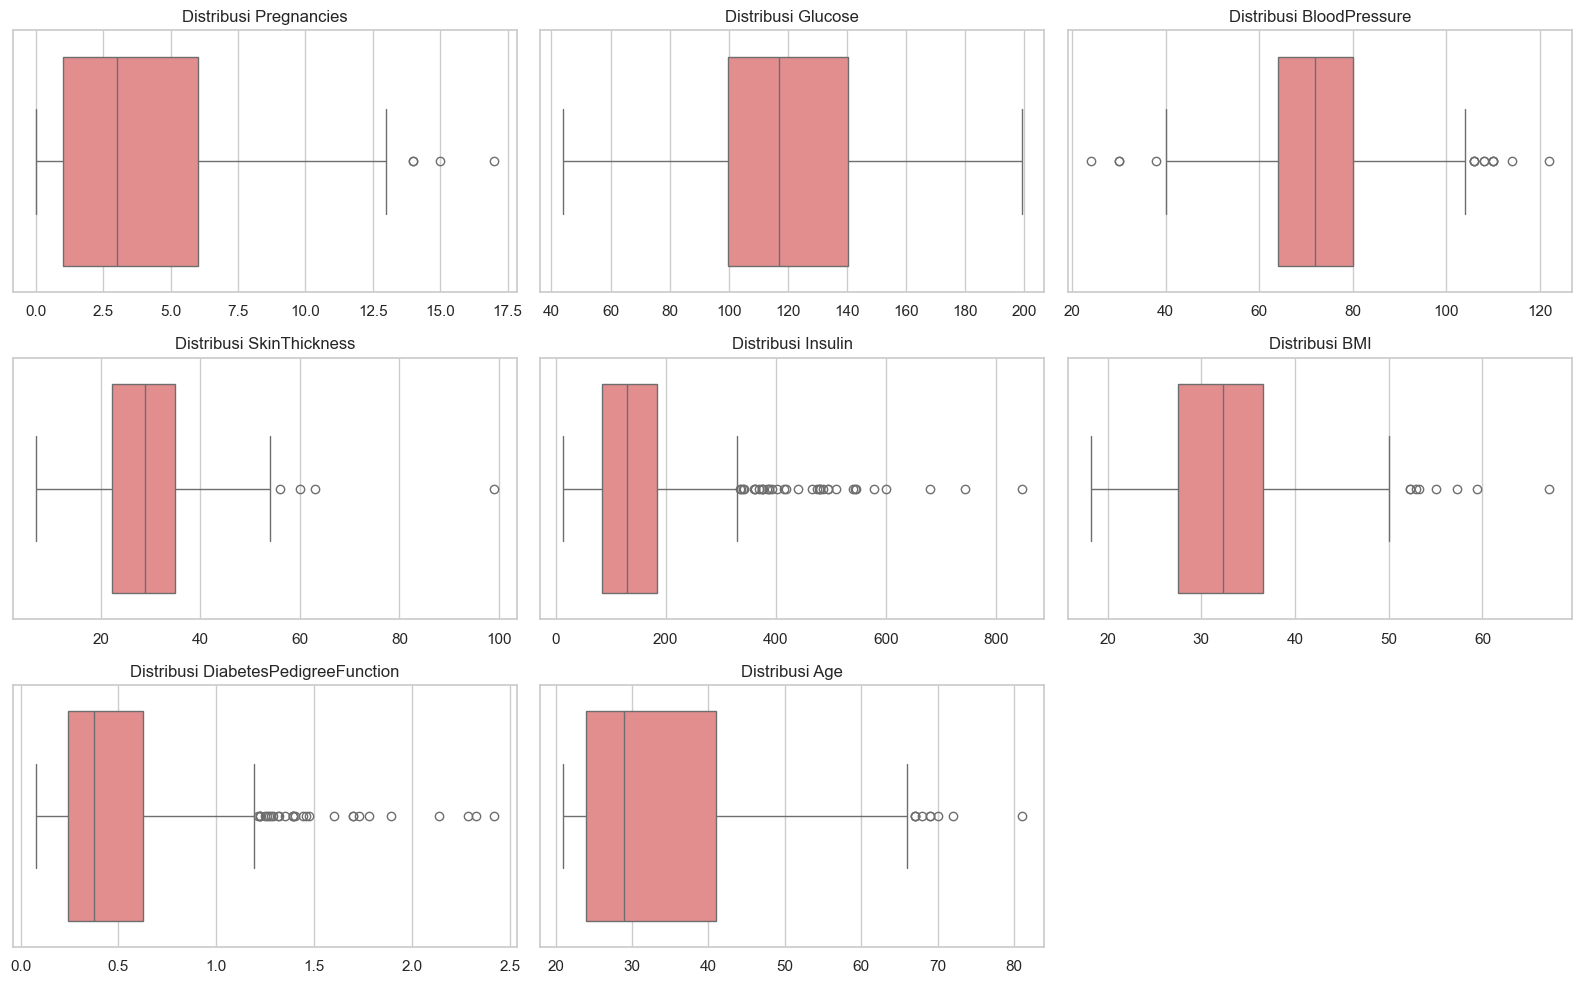

In [63]:
plt.figure(figsize=(16, 10))
for i, col in enumerate(all_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df_clean[col], color='lightcoral')
    plt.title(f'Distribusi {col}')
    plt.xlabel('')

plt.tight_layout()
plt.show()

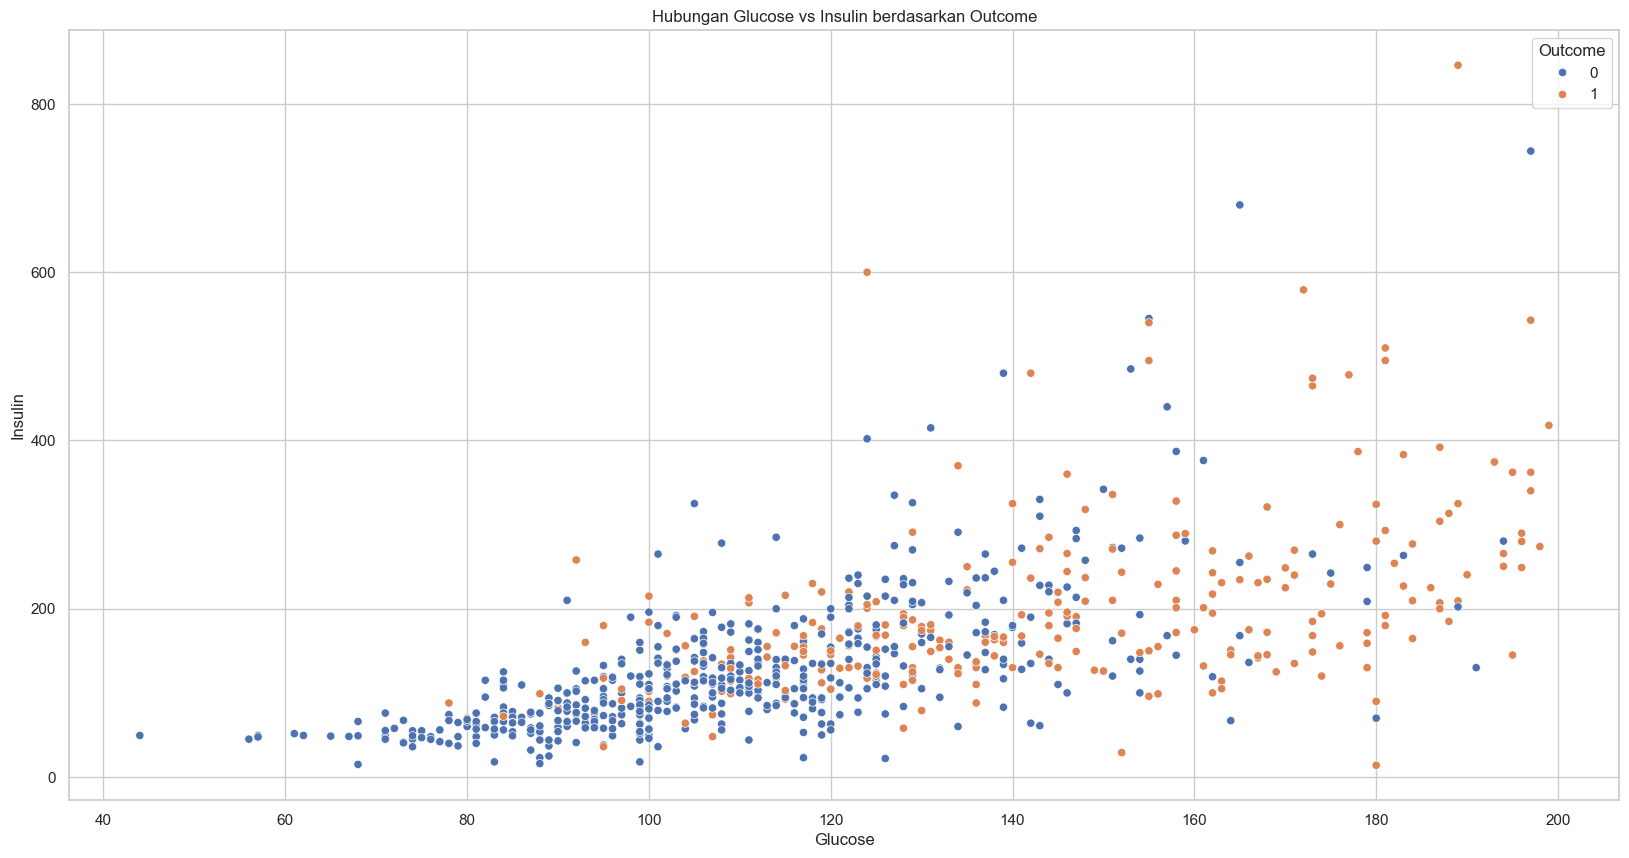

In [64]:
plt.figure(figsize=(20, 10))
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df_clean)
plt.title('Hubungan Glucose vs Insulin berdasarkan Outcome')
plt.show()

- Analisis Tren Biologis (Correlation)
        Terdapat korelasi positif yang jelas: Semakin tinggi Glucose, cenderung semakin tinggi pula Insulin.

        Secara medis, ini masuk akal karena tubuh memproduksi insulin untuk menekan kadar gula darah yang tinggi.

        Perhatikan area kanan atas: Di sana berkumpul banyak titik oranye (Outcome 1). Ini menunjukkan bahwa pasien dengan kombinasi gula darah tinggi dan insulin tinggi hampir dipastikan menderita diabetes (kondisi resistensi insulin).

- Identifikasi "Overlap Zone" (Zona Ambigu)
        Perhatikan area di tengah (Glucose antara 100-140 dan Insulin di bawah 200).

        Di area ini, titik biru (sehat) dan oranye (diabetes) bercampur sangat rapat.

        Insight Data Science: Ini berarti Glucose dan Insulin saja tidak cukup untuk membedakan pasien secara sempurna. Anda akan membutuhkan fitur tambahan seperti BMI, Age, atau DiabetesPedigreeFunction untuk membantu model memisahkan data di zona ini.

- Analisis Outlier Secara Visual

        Titik di atas Insulin 600: Ada beberapa pasien (baik biru maupun oranye) yang memiliki kadar insulin sangat ekstrem.

        Titik Biru di Insulin Tinggi: Menariknya, ada pasien sehat (biru) dengan insulin > 600 tapi gula darahnya tetap terkontrol (< 140). Ini adalah outlier yang bisa dianggap "noise" atau kasus klinis khusus yang sangat jarang.

        Titik Oranye di Glucose Tinggi tapi Insulin Rendah: Perhatikan titik-titik oranye di bagian bawah kanan (Glucose > 170, Insulin < 100). Secara medis, ini bisa mengindikasikan kerusakan sel beta pankreas (tubuh tidak lagi mampu memproduksi insulin meskipun gula darah sangat tinggi).

In [65]:

cols_to_cap = ['Glucose', 'BMI', 'BloodPressure']
cols_to_log = ['Insulin', 'DiabetesPedigreeFunction']

# 2. Proses Capping (Winsorization)
# memotong nilai ekstrem agar berada dalam rentang 1.5 * IQR
for col in cols_to_cap:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    # Mengganti nilai di luar batas dengan nilai batas itu sendiri
    df_clean[col] = np.where(df_clean[col] > upper_limit, upper_limit,
                    np.where(df_clean[col] < lower_limit, lower_limit, df_clean[col]))

# 3. Proses Log Transformation
# Menggunakan log1p (log(1+x)) untuk menangani distribusi yang miring (skewed)
for col in cols_to_log:
    df_clean[col] = np.log1p(df_clean[col])

print("Data Cleansing Selesai!")

Data Cleansing Selesai!


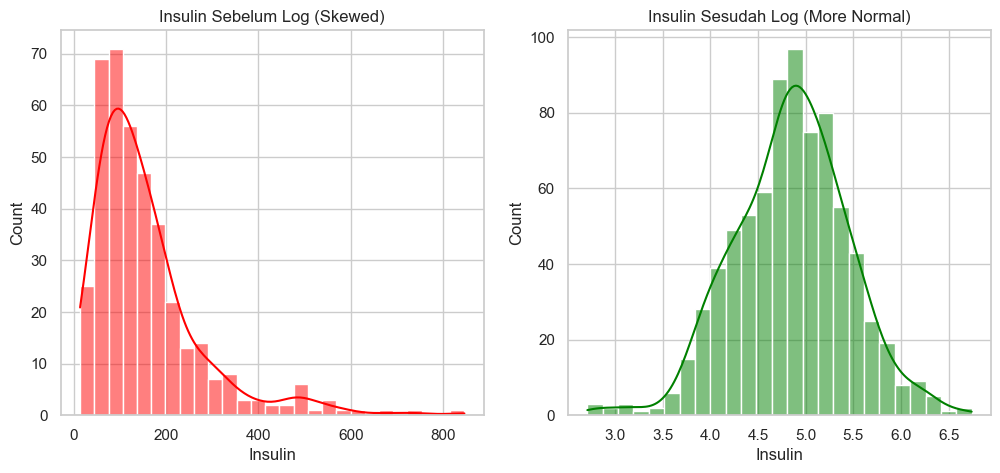

In [66]:
plt.figure(figsize=(12, 5))

# Sebelum Log
plt.subplot(1, 2, 1)
sns.histplot(df_temp['Insulin'], kde=True, color='red') # df_temp adalah data sebelum log
plt.title('Insulin Sebelum Log (Skewed)')

# Sesudah Log
plt.subplot(1, 2, 2)
sns.histplot(df_clean['Insulin'], kde=True, color='green')
plt.title('Insulin Sesudah Log (More Normal)')

plt.show()

## **Data Annotation**

In [67]:
# 1. Analisis Outcome dan Labeling
df_label = df_clean.copy()
print("Distribusi Outcome (Label Diabetes):")
print(df_label['Outcome'].value_counts())
print("\nPersentase:")
print(df_label['Outcome'].value_counts(normalize=True) * 100)

# 2. Kategori Risk Level berdasarkan Kombinasi Fitur Medis
def classify_diabetes_risk(row):
    """
    Klasifikasi risiko diabetes berdasarkan SOP medis:
    - LOW: Kontrol gula darah baik, tidak ada tanda diabetes
    - MEDIUM: Ada indikasi awal, perlu monitoring
    - HIGH: Risiko tinggi diabetes
    - DIABETES: Diagnosis positif diabetes
    """
    glucose = row['Glucose']
    insulin = row['Insulin']
    bmi = row['BMI']
    age = row['Age']
    outcome = row['Outcome']
    
    if outcome == 1:
        return 'DIABETES'
    elif glucose >= 126 or insulin > 200:
        return 'HIGH'
    elif glucose >= 100 or (bmi >= 30 and age >= 45):
        return 'MEDIUM'
    else:
        return 'LOW'

df_label['Risk_Level'] = df_label.apply(classify_diabetes_risk, axis=1)

# 3. Analisis Distribusi Label
print("\nDistribusi Risk Level:")
print(df_label['Risk_Level'].value_counts())
print("\nPersentase Risk Level:")
print(df_label['Risk_Level'].value_counts(normalize=True) * 100)

Distribusi Outcome (Label Diabetes):
Outcome
0    500
1    268
Name: count, dtype: int64

Persentase:
Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

Distribusi Risk Level:
Risk_Level
DIABETES    268
MEDIUM      209
LOW         170
HIGH        121
Name: count, dtype: int64

Persentase Risk Level:
Risk_Level
DIABETES    34.895833
MEDIUM      27.213542
LOW         22.135417
HIGH        15.755208
Name: proportion, dtype: float64


In [68]:
df_clean.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,5.347108,33.6,0.486738,50,1
1,1,85.0,66.0,29.0,4.304065,26.6,0.300845,31,0
2,8,183.0,64.0,29.4,5.951163,23.3,0.514021,32,1
3,1,89.0,66.0,23.0,4.553877,28.1,0.154436,21,0
4,0,137.0,40.0,35.0,5.129899,43.1,1.190279,33,1


# **Data Screening**

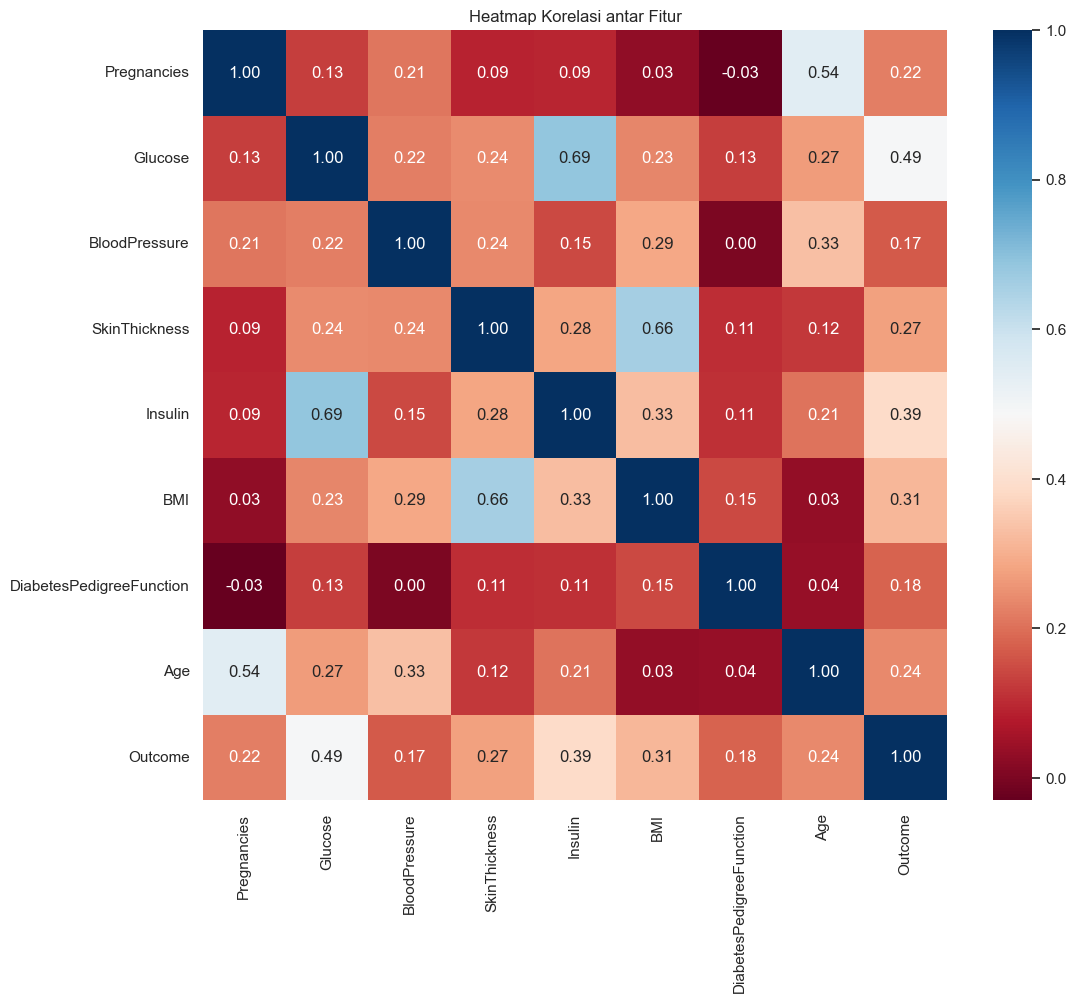

In [69]:
plt.figure(figsize=(12, 10))
correlation_matrix = df_clean.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu', fmt='.2f')
plt.title('Heatmap Korelasi antar Fitur')
plt.show()

*BMI dan SkinThickness memiliki korelasi yang sangat tinggi, kita mungkin perlu mempertimbangkan untuk menghapus salah satunya atau menggabungkannya melalui PCA (Principal Component Analysis) agar model tidak "bingung"*

In [70]:
# Cek nilai skewness secara statistik
skewness_old = df[['Insulin', 'DiabetesPedigreeFunction', 'Glucose', 'BMI']].skew()
print("Nilai Skewness Sebelum:")
print(skewness_old)
skewness = df_clean[['Insulin', 'DiabetesPedigreeFunction', 'Glucose', 'BMI']].skew()
print("Nilai Skewness Sesudah:")
print(skewness)

Nilai Skewness Sebelum:
Insulin                     2.166464
DiabetesPedigreeFunction    1.919911
Glucose                     0.530989
BMI                         0.593970
dtype: float64
Nilai Skewness Sesudah:
Insulin                    -0.149800
DiabetesPedigreeFunction    1.117942
Glucose                     0.535587
BMI                         0.349882
dtype: float64


*Transformasi logaritmik pada Insulin sangat efektif (mendekati 0). Namun, DiabetesPedigreeFunction masih memiliki skewness yang cukup tinggi (> 1.0), yang perlu diperhatikan saat memilih algoritma (disarankan menggunakan model berbasis pohon/Tree-based).*

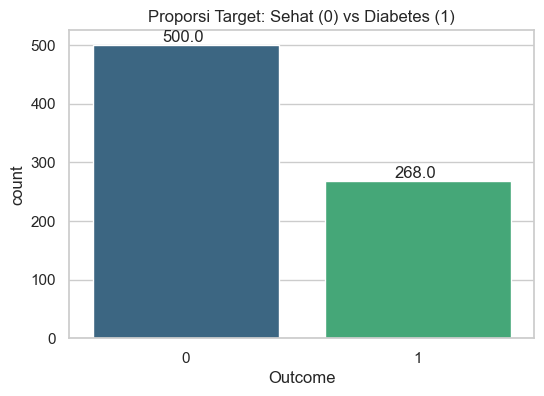

In [71]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='Outcome', data=df_clean, palette='viridis')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x()+0.3, p.get_height()+5))
plt.title('Proporsi Target: Sehat (0) vs Diabetes (1)')
plt.show()

Dataset ini mengalami Class Imbalance (sekitar 65% sehat vs 35% diabetes).
Model mungkin akan sangat jago menebak orang "Sehat" tapi sering salah menebak orang "Diabetes". Kita perlu mempertimbangkan metrik Recall atau F1-Score sebagai acuan, bukan sekadar Accuracy.

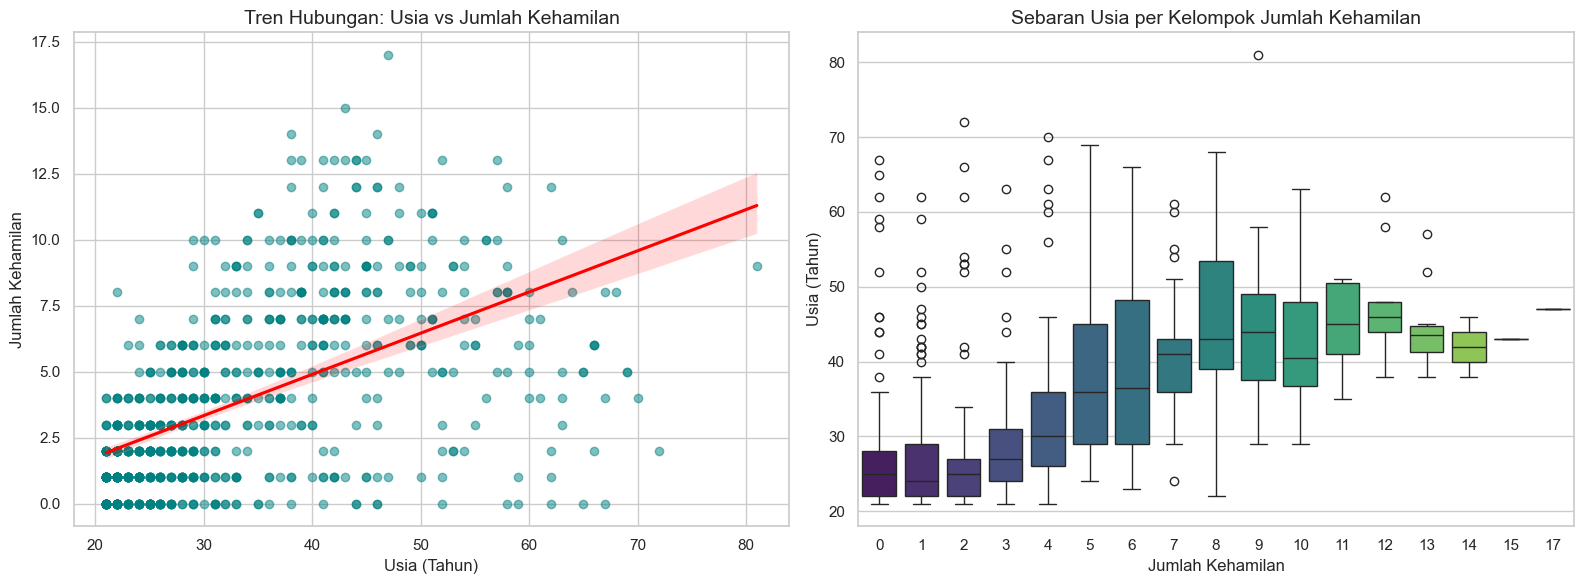

In [72]:
# Mengatur tema visualisasi
sns.set_theme(style="whitegrid")

# Membuat figure dengan 2 subplot
plt.figure(figsize=(16, 6))

# 1. Scatter Plot dengan Garis Regresi
# Berguna untuk melihat tren umum hubungan antara Usia dan Kehamilan
plt.subplot(1, 2, 1)
sns.regplot(data=df_clean, x='Age', y='Pregnancies', 
            scatter_kws={'alpha':0.5, 'color':'teal'}, 
            line_kws={'color':'red'})
plt.title('Tren Hubungan: Usia vs Jumlah Kehamilan', fontsize=14)
plt.xlabel('Usia (Tahun)')
plt.ylabel('Jumlah Kehamilan')

# 2. Boxplot Usia berdasarkan Jumlah Kehamilan
# Berguna untuk melihat distribusi umur dan mendeteksi outlier pada tiap jumlah kehamilan
plt.subplot(1, 2, 2)
sns.boxplot(data=df_clean, x='Pregnancies', y='Age', palette='viridis')
plt.title('Sebaran Usia per Kelompok Jumlah Kehamilan', fontsize=14)
plt.xlabel('Jumlah Kehamilan')
plt.ylabel('Usia (Tahun)')

# Menyesuaikan tata letak agar tidak tumpang tindih
plt.tight_layout()
plt.show()

# **Penerapan dan Evaluasi Model**

1. Pembagian Data (Train-Test Split)
Data dibagi menjadi dua bagian: Training Set (untuk melatih model) dan Testing Set (untuk mengevaluasi performa model).

Rasio: 80% Training, 20% Testing.

Stratification: Kita menggunakan parameter stratify=y untuk memastikan proporsi kelas Outcome (Diabetes vs Sehat) tetap konsisten baik di data training maupun testing. Ini sangat penting karena dataset kita memiliki sedikit ketidakseimbangan kelas (class imbalance).

In [73]:
from sklearn.model_selection import train_test_split

# Menentukan Fitur (X) dan Target (y)
X = df_clean.drop('Outcome', axis=1)
y = df_clean['Outcome']

# Eksekusi Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing : {len(X_test)}")

Jumlah data training: 614
Jumlah data testing : 154


2. Penyeragaman Skala (Robust Scaling)
Karena fitur kita memiliki rentang yang berbeda (misal: Glucose di angka 100-an sementara Pedigree di angka 0-an) dan masih mengandung beberapa nilai ekstrem, kita menggunakan RobustScaler.

Mengapa RobustScaler? Scaler ini menggunakan Median dan IQR, sehingga tidak terpengaruh oleh outlier yang mungkin masih tersisa setelah tahap pembersihan sebelumnya.

Mencegah Data Leakage: Proses fit (penghitungan statistik) hanya dilakukan pada X_train. Data X_test hanya mengikuti transformasi tersebut agar model benar-benar objektif.

In [74]:
from sklearn.preprocessing import RobustScaler

# Inisialisasi Scaler
scaler = RobustScaler()

# Fit dan Transform pada data training
X_train_scaled = scaler.fit_transform(X_train)

# Transform pada data testing (menggunakan parameter dari training)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame untuk kemudahan analisis
X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)

# **Model Training**

## Skenario 1: Semua Fitur digunakan

In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Inisialisasi Model Random Forest
# n_estimators: Jumlah pohon dalam "hutan"
# max_depth: Kedalaman maksimum setiap pohon untuk mencegah overfitting
# random_state: Memastikan hasil yang konsisten setiap kali dijalankan
model_rf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=5, 
    random_state=42
)

# 2. Latih model dengan data training yang sudah di-scale
model_rf.fit(X_train_scaled, y_train)

# 3. Lakukan prediksi dengan data testing
y_pred_rf = model_rf.predict(X_test_scaled)

# 4. Evaluasi Akurasi
accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Akurasi model Random Forest: {accuracy:.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf))

Akurasi model Random Forest: 0.7468

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.78      0.85      0.81       100
           1       0.67      0.56      0.61        54

    accuracy                           0.75       154
   macro avg       0.72      0.70      0.71       154
weighted avg       0.74      0.75      0.74       154



In [76]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Inisialisasi Model XGBoost
# learning_rate: Mengontrol seberapa cepat model belajar (mencegah overfitting)
# n_estimators: Jumlah pohon yang akan dibangun secara berurutan
# use_label_encoder=False: Menghindari peringatan (warning) pada versi terbaru
model_boost = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 2. Latih model dengan data training yang sudah di-scale
model_boost.fit(X_train_scaled, y_train)

# 3. Lakukan prediksi dengan data testing
y_pred_boost = model_boost.predict(X_test_scaled)

# 4. Evaluasi Akurasi
accuracy = accuracy_score(y_test, y_pred_boost)

Akurasi model XGBoost: 0.75

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.80      0.81      0.81       100
           1       0.64      0.63      0.64        54

    accuracy                           0.75       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



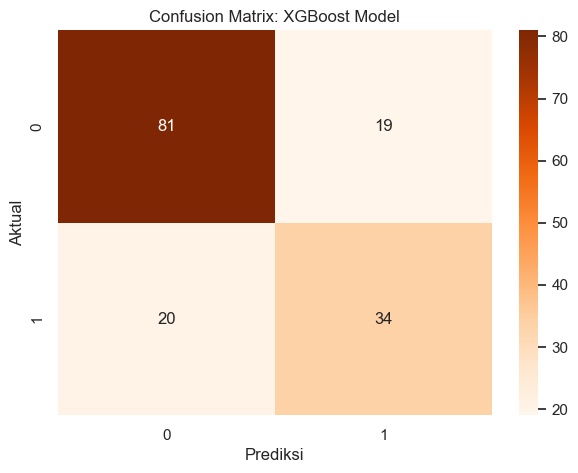

In [77]:
print(f"Akurasi model XGBoost: {accuracy:.2f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_boost))

# Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred_boost)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title('Confusion Matrix: XGBoost Model')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

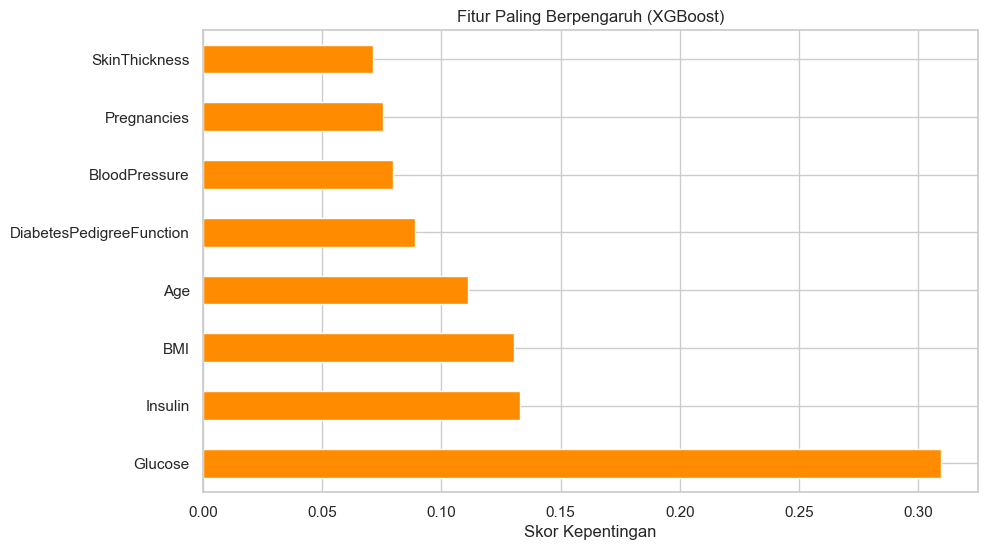

In [37]:
# Plot Feature Importance
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(model_boost.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh', color='darkorange')
plt.title('Fitur Paling Berpengaruh (XGBoost)')
plt.xlabel('Skor Kepentingan')
plt.show()

In [78]:
print("\nHasil Eksekusi Final:")
print(f"- Algoritma yang digunakan: XGBoost (Gradient Boosting)")
print(f"- Fitur yang digunakan: {X.columns.tolist()}")
print(f"- Akurasi model: {accuracy:.4f}")
print(f"- Parameter Utama: learning_rate={model_boost.learning_rate}, n_estimators={model_boost.n_estimators}, max_depth={model_boost.max_depth}")


Hasil Eksekusi Final:
- Algoritma yang digunakan: XGBoost (Gradient Boosting)
- Fitur yang digunakan: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
- Akurasi model: 0.7468
- Parameter Utama: learning_rate=0.1, n_estimators=100, max_depth=5


In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Tentukan Ruang Parameter (Grid)
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 1.0]
}

# 2. Inisialisasi Model
gbc = GradientBoostingClassifier(random_state=42)

# 3. Inisialisasi Grid Search dengan Cross-Validation (CV=5)
# n_jobs=-1 menggunakan seluruh core processor untuk mempercepat proses
grid_search = GridSearchCV(estimator=gbc, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# 4. Latih Model untuk mencari parameter terbaik
grid_search.fit(X_train_scaled, y_train)

# 5. Ambil Model Terbaik
best_model = grid_search.best_estimator_
y_pred_optimized = best_model.predict(X_test_scaled)

In [80]:
# Menampilkan parameter terbaik hasil tuning
print("--- Hasil Optimasi Model ---")
print(f"Kombinasi Parameter Terbaik: {grid_search.best_params_}")
print(f"Akurasi Skor Validasi Terbaik: {grid_search.best_score_:.4f}")

# Pengujian pada Data Testing
accuracy_final = accuracy_score(y_test, y_pred_optimized)
print(f"Akurasi Final pada Data Testing: {accuracy_final:.4f}")

--- Hasil Optimasi Model ---
Kombinasi Parameter Terbaik: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50, 'subsample': 0.8}
Akurasi Skor Validasi Terbaik: 0.7704
Akurasi Final pada Data Testing: 0.7208



--- Laporan Klasifikasi Final ---
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       100
           1       0.61      0.57      0.59        54

    accuracy                           0.72       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.72      0.72      0.72       154



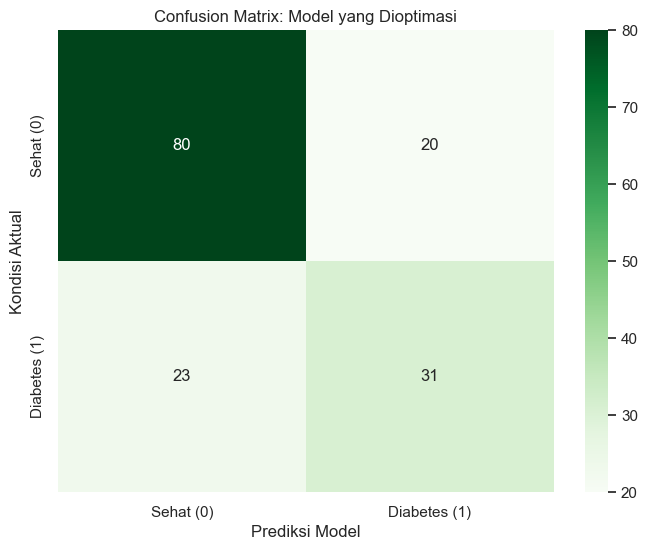

In [41]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Classification Report
print("\n--- Laporan Klasifikasi Final ---")
print(classification_report(y_test, y_pred_optimized))

# 2. Visualisasi Confusion Matrix
cm = confusion_matrix(y_test, y_pred_optimized)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Sehat (0)', 'Diabetes (1)'], 
            yticklabels=['Sehat (0)', 'Diabetes (1)'])
plt.title('Confusion Matrix: Model yang Dioptimasi')
plt.xlabel('Prediksi Model')
plt.ylabel('Kondisi Aktual')
plt.show()


In [81]:
from sklearn.ensemble import HistGradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 1. Definisi Ruang Parameter untuk HistGradientBoosting
param_grid_hgb = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_iter': [100, 150],
    'max_depth': [3, 5],
    'l2_regularization': [0.1, 1.0, 10.0] # Menambah regularisasi untuk menembus stagnasi
}

# 2. Tuning Model
hgb = HistGradientBoostingClassifier(random_state=42)
grid_hgb = GridSearchCV(hgb, param_grid_hgb, cv=5, scoring='accuracy', n_jobs=-1)
grid_hgb.fit(X_train_scaled, y_train)

best_hgb = grid_hgb.best_estimator_
print(f"Parameter HGB Terbaik: {grid_hgb.best_params_}")

Parameter HGB Terbaik: {'l2_regularization': 10.0, 'learning_rate': 0.1, 'max_depth': 3, 'max_iter': 150}


In [82]:
# Menyiapkan model pendukung
rf_support = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
lr_support = LogisticRegression(max_iter=1000, random_state=42)

# Membuat Ensemble (Voting Soft)
# 'soft' voting memberikan bobot berdasarkan probabilitas keyakinan model
voting_model = VotingClassifier(
    estimators=[
        ('hgb', best_hgb), 
        ('rf', rf_support), 
        ('lr', lr_support)
    ],
    voting='soft'
)

# Melatih Model Ensemble
voting_model.fit(X_train_scaled, y_train)
y_pred_ensemble = voting_model.predict(X_test_scaled)

In [83]:
from sklearn.metrics import accuracy_score, classification_report

accuracy_final = accuracy_score(y_test, y_pred_ensemble)
print(f"Akurasi Final Ensemble: {accuracy_final:.4f}")
print("\nLaporan Klasifikasi Final:")
print(classification_report(y_test, y_pred_ensemble))

Akurasi Final Ensemble: 0.7468

Laporan Klasifikasi Final:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       100
           1       0.65      0.59      0.62        54

    accuracy                           0.75       154
   macro avg       0.72      0.71      0.72       154
weighted avg       0.74      0.75      0.74       154



## Skenario 2: Fitur yang memiliki Skor 

In [43]:
# Gunakan kurung siku [] untuk membungkus daftar kolom
X = df_clean.drop(['Outcome', 'SkinThickness', 'Pregnancies', 'BloodPressure'], axis=1)
y = df_clean['Outcome']

# Sekarang eksekusi split akan berjalan lancar
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [44]:
from sklearn.preprocessing import RobustScaler

# Inisialisasi Scaler
scaler = RobustScaler()

# Fit dan Transform pada data training
X_train_scaled = scaler.fit_transform(X_train)

# Transform pada data testing (menggunakan parameter dari training)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame untuk kemudahan analisis
X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)

In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. Inisialisasi Model XGBoost
# learning_rate: Mengontrol seberapa cepat model belajar (mencegah overfitting)
# n_estimators: Jumlah pohon yang akan dibangun secara berurutan
# use_label_encoder=False: Menghindari peringatan (warning) pada versi terbaru
model_boost = XGBClassifier(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

# 2. Latih model dengan data training yang sudah di-scale
model_boost.fit(X_train_scaled, y_train)

# 3. Lakukan prediksi dengan data testing
y_pred_boost = model_boost.predict(X_test_scaled)

# 4. Evaluasi Akurasi
accuracy = accuracy_score(y_test, y_pred_boost)

In [46]:
print("\nHasil Eksekusi Final:")
print(f"- Algoritma yang digunakan: XGBoost (Gradient Boosting)")
print(f"- Fitur yang digunakan: {X.columns.tolist()}")
print(f"- Akurasi model: {accuracy:.4f}")
print(f"- Parameter Utama: learning_rate={model_boost.learning_rate}, n_estimators={model_boost.n_estimators}, max_depth={model_boost.max_depth}")


Hasil Eksekusi Final:
- Algoritma yang digunakan: XGBoost (Gradient Boosting)
- Fitur yang digunakan: ['Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
- Akurasi model: 0.7143
- Parameter Utama: learning_rate=0.1, n_estimators=100, max_depth=5


In [47]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Inisialisasi Model Random Forest
# n_estimators: Jumlah pohon dalam "hutan"
# max_depth: Kedalaman maksimum setiap pohon untuk mencegah overfitting
# random_state: Memastikan hasil yang konsisten setiap kali dijalankan
model_rf = RandomForestClassifier(
    n_estimators=100, 
    max_depth=5, 
    random_state=42
)

# 2. Latih model dengan data training yang sudah di-scale
model_rf.fit(X_train_scaled, y_train)

# 3. Lakukan prediksi dengan data testing
y_pred_rf = model_rf.predict(X_test_scaled)

# 4. Evaluasi Akurasi
accuracy = accuracy_score(y_test, y_pred_rf)

print(f"Akurasi model Random Forest: {accuracy:.4f}")
print("\nLaporan Klasifikasi:")
print(classification_report(y_test, y_pred_rf))

Akurasi model Random Forest: 0.7208

Laporan Klasifikasi:
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       100
           1       0.62      0.52      0.57        54

    accuracy                           0.72       154
   macro avg       0.69      0.67      0.68       154
weighted avg       0.71      0.72      0.71       154

